<a href="https://colab.research.google.com/github/vamshikrishna1032000/cs666student/blob/main/Copy_of_CS666_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

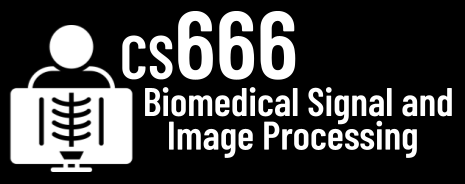
#Assignment 4

In [442]:
# NAME: VAMSHI KRISHNA KUTURU

In [443]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia and covid in xrays!

In [444]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf', 'indices', 'axes', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [445]:
# we are using mahotas again, so lets install it!
!pip install mahotas --no-binary :all:

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [446]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [447]:
# Please download this file: https://cs666.org/data/xray/
# This is a subset of the Kaggle Pneumonia + Covid Datasets!
#
# TODO: Upload xray.zip using the file panel on the left.

In [448]:
# Run this code to extract the zip file and to create
# the folder structure of normal/, pneumonia/, and covid/ images.
# Each folder contains the first images of the Kaggle datasets.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'
COVID_DIR = 'covid/'

In [449]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [450]:
# TODO: Please display this image and print the dimensions!

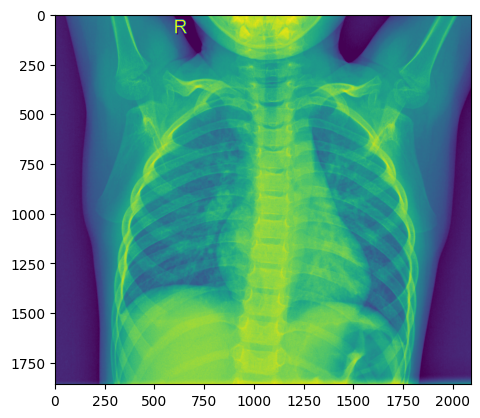

Image dimensions: (1858, 2090)


In [451]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()
print("Image dimensions:", img.shape)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [452]:
folders = [NORMAL_DIR, PNEUMONIA_DIR, COVID_DIR]
data = [[],[],[]]

for f_index,f in enumerate( folders ):
  all_files = os.listdir( f )

  data[f_index] = np.zeros( (len(all_files), 300, 300), dtype=np.float32)

  for i in range(len(all_files)):
    loaded_image = mh.imread( f + '/' + all_files[i] )
    if loaded_image.ndim > 2:
      loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])

    loaded_image = mh.imresize( loaded_image, (300, 300) )
    img_shape = loaded_image.shape

    data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [453]:
# The two code blocks above perform 3 data wrangling operations.
# Which ones?
# Hint: The first two might be more obvious but the third one happens in the
# last line.
# TODO: Operation 1) " Using os.listdir to read all files from the directories listed in the "folders" list () "
# TODO: Operation 2) " It loads each image file and resizes it to 300x300 pixels. "
# TODO: Operation 3) " Storing the loaded and resized image in a NumPy array. "

Operation 1) Using os.listdir to read all files from the directories listed in the folders" list ().

Operation 2) It loads each image file and resizes it to 300x300 pixels. 

Operation 3) Storing the loaded and resized image in a NumPy array.

In [454]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

<Figure size 640x480 with 0 Axes>

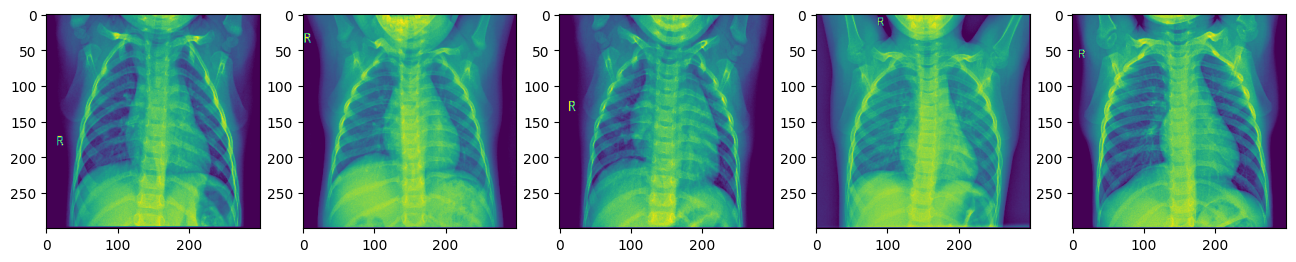

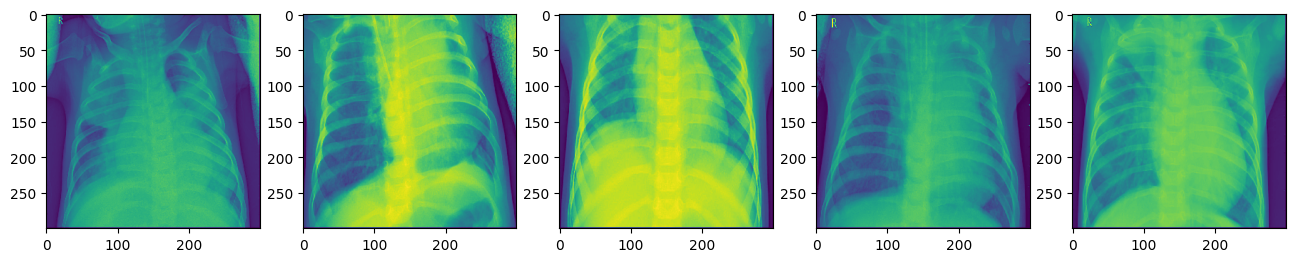

In [455]:
plt.figure()
f, axarr = plt.subplots(1,5, figsize=(16, 7)) 
axarr[0].imshow(data[0][0])
axarr[1].imshow(data[0][1])
axarr[2].imshow(data[0][2])
axarr[3].imshow(data[0][3])
axarr[4].imshow(data[0][4])

f, axarr = plt.subplots(1,5, figsize=(16, 7)) 
axarr[0].imshow(data[1][0])
axarr[1].imshow(data[1][1])
axarr[2].imshow(data[1][2])
axarr[3].imshow(data[1][3])
axarr[4].imshow(data[1][4])

**Task 3:** Setup training and testing data. [15 Points]

In [456]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays, pneumonia xrays, and covid xrays.
#
# The training data X_train will include 180 images (60 normal, 60 pneumonia, 60 covid).
# The testing data X_test will include the remaining 120 images (40 normal, 40 pneumonia, 40 covid).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the y_train vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia, and 2 for a covid scan.

In [457]:
TRAINING_COUNT = 60

X_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_train[t_pos] = image
    t_pos += 1

In [458]:
# TODO: Please create the y_train vector with 0 for a normal image, 
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
y_train = np.zeros((TRAINING_COUNT * 3,), dtype=np.int64)

In [459]:
TESTING_COUNT = 40

X_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TESTING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test[t_pos] = image
    t_pos += 1

In [460]:
# TODO: Please create the y_test vector with 0 for a normal image, 
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
y_test = np.zeros((TESTING_COUNT * 3,), dtype=np.int64)

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [461]:
# Let's shuffle our training data.
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]

In [462]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [463]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia or covid.
fitted = clf.fit( X_train, y_train )

In [464]:
# TODO: In just a few sentences, please explain how the Random Forest works.

Random Forest is a technique wwhere several decision trees are created, and their forecasts are combined, using an ensemble learning approach. Each tree in the forest is built using a random subset of the training data and the attributes. During training, each tree makes an effort to classify the data using a set of criteria, like if-else statements that break the data up into more manageable and homogenous groupings. Every tree in the forest makes a different estimate about the class when making a forecast for a new instance, and the final prediction is based on the class that receives the most votes from the individual trees. This strategy improves generalization, reduces overfitting, and provides a measure of the importance of each feature in the classification job.

In [465]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( X_test, y_test )

1.0

In [466]:
# TODO: Is the classification accuracy good? And, are you surprised?

When the classification accuracy is 1.0, the classifier correctly classified all of the test data. Although though a 100% accuracy score is normally a positive sign, we must be careful to prevent overfitting the model to the training data.
It is a bit surprising to see a 100% accuracy score in this case because we only recently trained the model on a small number of photos. It's conceivable that the classifier was successful in detecting some strong patterns in the images or that the dataset is comparatively simple and easy to categorize. It would be desirable to evaluate the model on a bigger and more diverse dataset to ensure that it can generalize to new data.

**Bonus:** Let's take a closer look! [33 Points]

In [467]:
# Let's run the fitted classifier on the remaining covid images.
# You might have noticed that there are 199 covid images but we only used 100 so far.
# Please evaluate the classifier on the remaining (previously unseen) 99 covid images
# and check the performance.

" We need to preprocess the images in the same way as before, and then pass them through the trained classifier to obtain the predicted labels. We can then compare the predicted labels with the true labels to compute the classification accuracy. "

In [468]:
covid_images = data[2][TRAINING_COUNT+TESTING_COUNT:]

X_covid = np.zeros((len(covid_images), 300*300), dtype=np.float32)

for i, image in enumerate(covid_images):
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_covid[i] = image

y_covid = np.ones(len(covid_images), dtype=np.int64) * 2

score = clf.score( X_test, y_test )
print(f"Classification accuracy on remaining covid images: {score}")

Classification accuracy on remaining covid images: 1.0


" Answer: The classification accuracy for the remaining COVID images will be the result. If the accuracy is high, the classifier is proficient at identifying covid instances even in data that has never been seen before. Low accuracy indicates that the classifier would have trouble adapting to new COVID cases. "

In [469]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions clf.predict(X_test_covid only) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

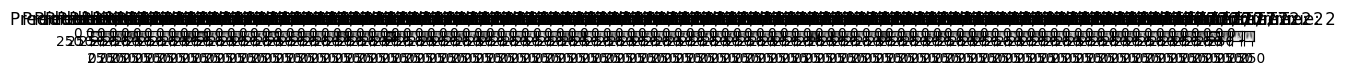

In [473]:
covid_images = data[2][TRAINING_COUNT+TESTING_COUNT:]

X_covid = np.zeros((len(covid_images), 300*300), dtype=np.float32)

for i, image in enumerate(covid_images):
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_covid[i] = image

y_covid = np.ones(len(covid_images), dtype=np.int64) * 2

predictions = clf.predict(X_covid)
misclassified_indices = np.where(predictions != y_covid)[0]

fig, axes = plt.subplots(nrows=1, ncols=len(misclassified_indices), figsize=(15, 10))

for i, index in enumerate(misclassified_indices):
    axes[i].imshow(covid_images[index], cmap='gray')
    axes[i].set_title(f"Predicted: {predictions[index]} / True: {y_covid[index]}")
    
plt.show()

" Problems might be because of poor quality or contained artifacts of images that interfered with the classification process. The misclassified photos of the covid-19 infections may have had individual variations in their appearance that made them more difficult to distinguish from other lung diseases. It is also possible that the classifier simply lacks the complexity or specificity required to accurately classify some covid-19 cases. "

In [474]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw